In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("/g/korbel2/weber/workspace/mosaicatcher-update/.tests/output_T2T/ploidy/RPE-BM510/ploidy_detailled.txt", sep="\t")
df = df.loc[df["#chrom"] != "genome"]
chroms = ["chr" + str(c) for c in list(range(1,23))] + ["chrX"] 
df["#chrom"] = pd.Categorical(df["#chrom"], categories=chroms, ordered=True)
df = df.sort_values(by=["#chrom", "start"])
df

# df = df.loc[df["#chrom"] == "chr21"]


,#chrom,start,end,logLH-ploidy-1,logLH-ploidy-2,logLH-ploidy-3,logLH-ploidy-4,logLH-ploidy-5,logLH-ploidy-6,ploidy_estimate
0,chr1,0,1000000,-58.511442,14.558147,-5.060019,-22.763171,-23.426629,-29.148636,2
1,chr1,500000,1500000,-57.718357,15.273324,-7.892801,-20.263200,-27.094421,-34.569007,2
2,chr1,1000000,2000000,-57.841521,25.174431,-7.903770,-19.048638,-26.949741,-35.574079,2
3,chr1,1500000,2500000,-58.722936,27.043410,-8.209462,-20.309027,-27.409089,-35.880299,2
4,chr1,2000000,3000000,-58.781646,32.939814,-8.533795,-19.698240,-27.395414,-36.525880,2
...,...,...,...,...,...,...,...,...,...,...
6073,chrX,151000000,152000000,-60.673422,44.101577,1.583244,-20.252591,-20.986326,-22.930880,2
6074,chrX,151500000,152500000,-57.702754,23.122381,-7.730778,-20.142300,-27.149359,-35.004636,2
6075,chrX,152000000,153000000,-60.973834,28.468452,3.092383,-10.651183,-19.004256,-18.484991,2
6076,chrX,152500000,153500000,-61.097735,48.057575,1.909076,-10.256221,-20.308791,-18.034597,2


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
# sns.set_theme(style="whitegrid")

In [48]:
df["#chrom"][:500]

0       chr1
338     chr1
337     chr1
336     chr1
335     chr1
        ... 
2724    chr2
2723    chr2
2722    chr2
2721    chr2
2718    chr2
Name: #chrom, Length: 500, dtype: category
Categories (23, object): ['chr1' < 'chr2' < 'chr3' < 'chr4' ... 'chr20' < 'chr21' < 'chr22' < 'chrX']

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


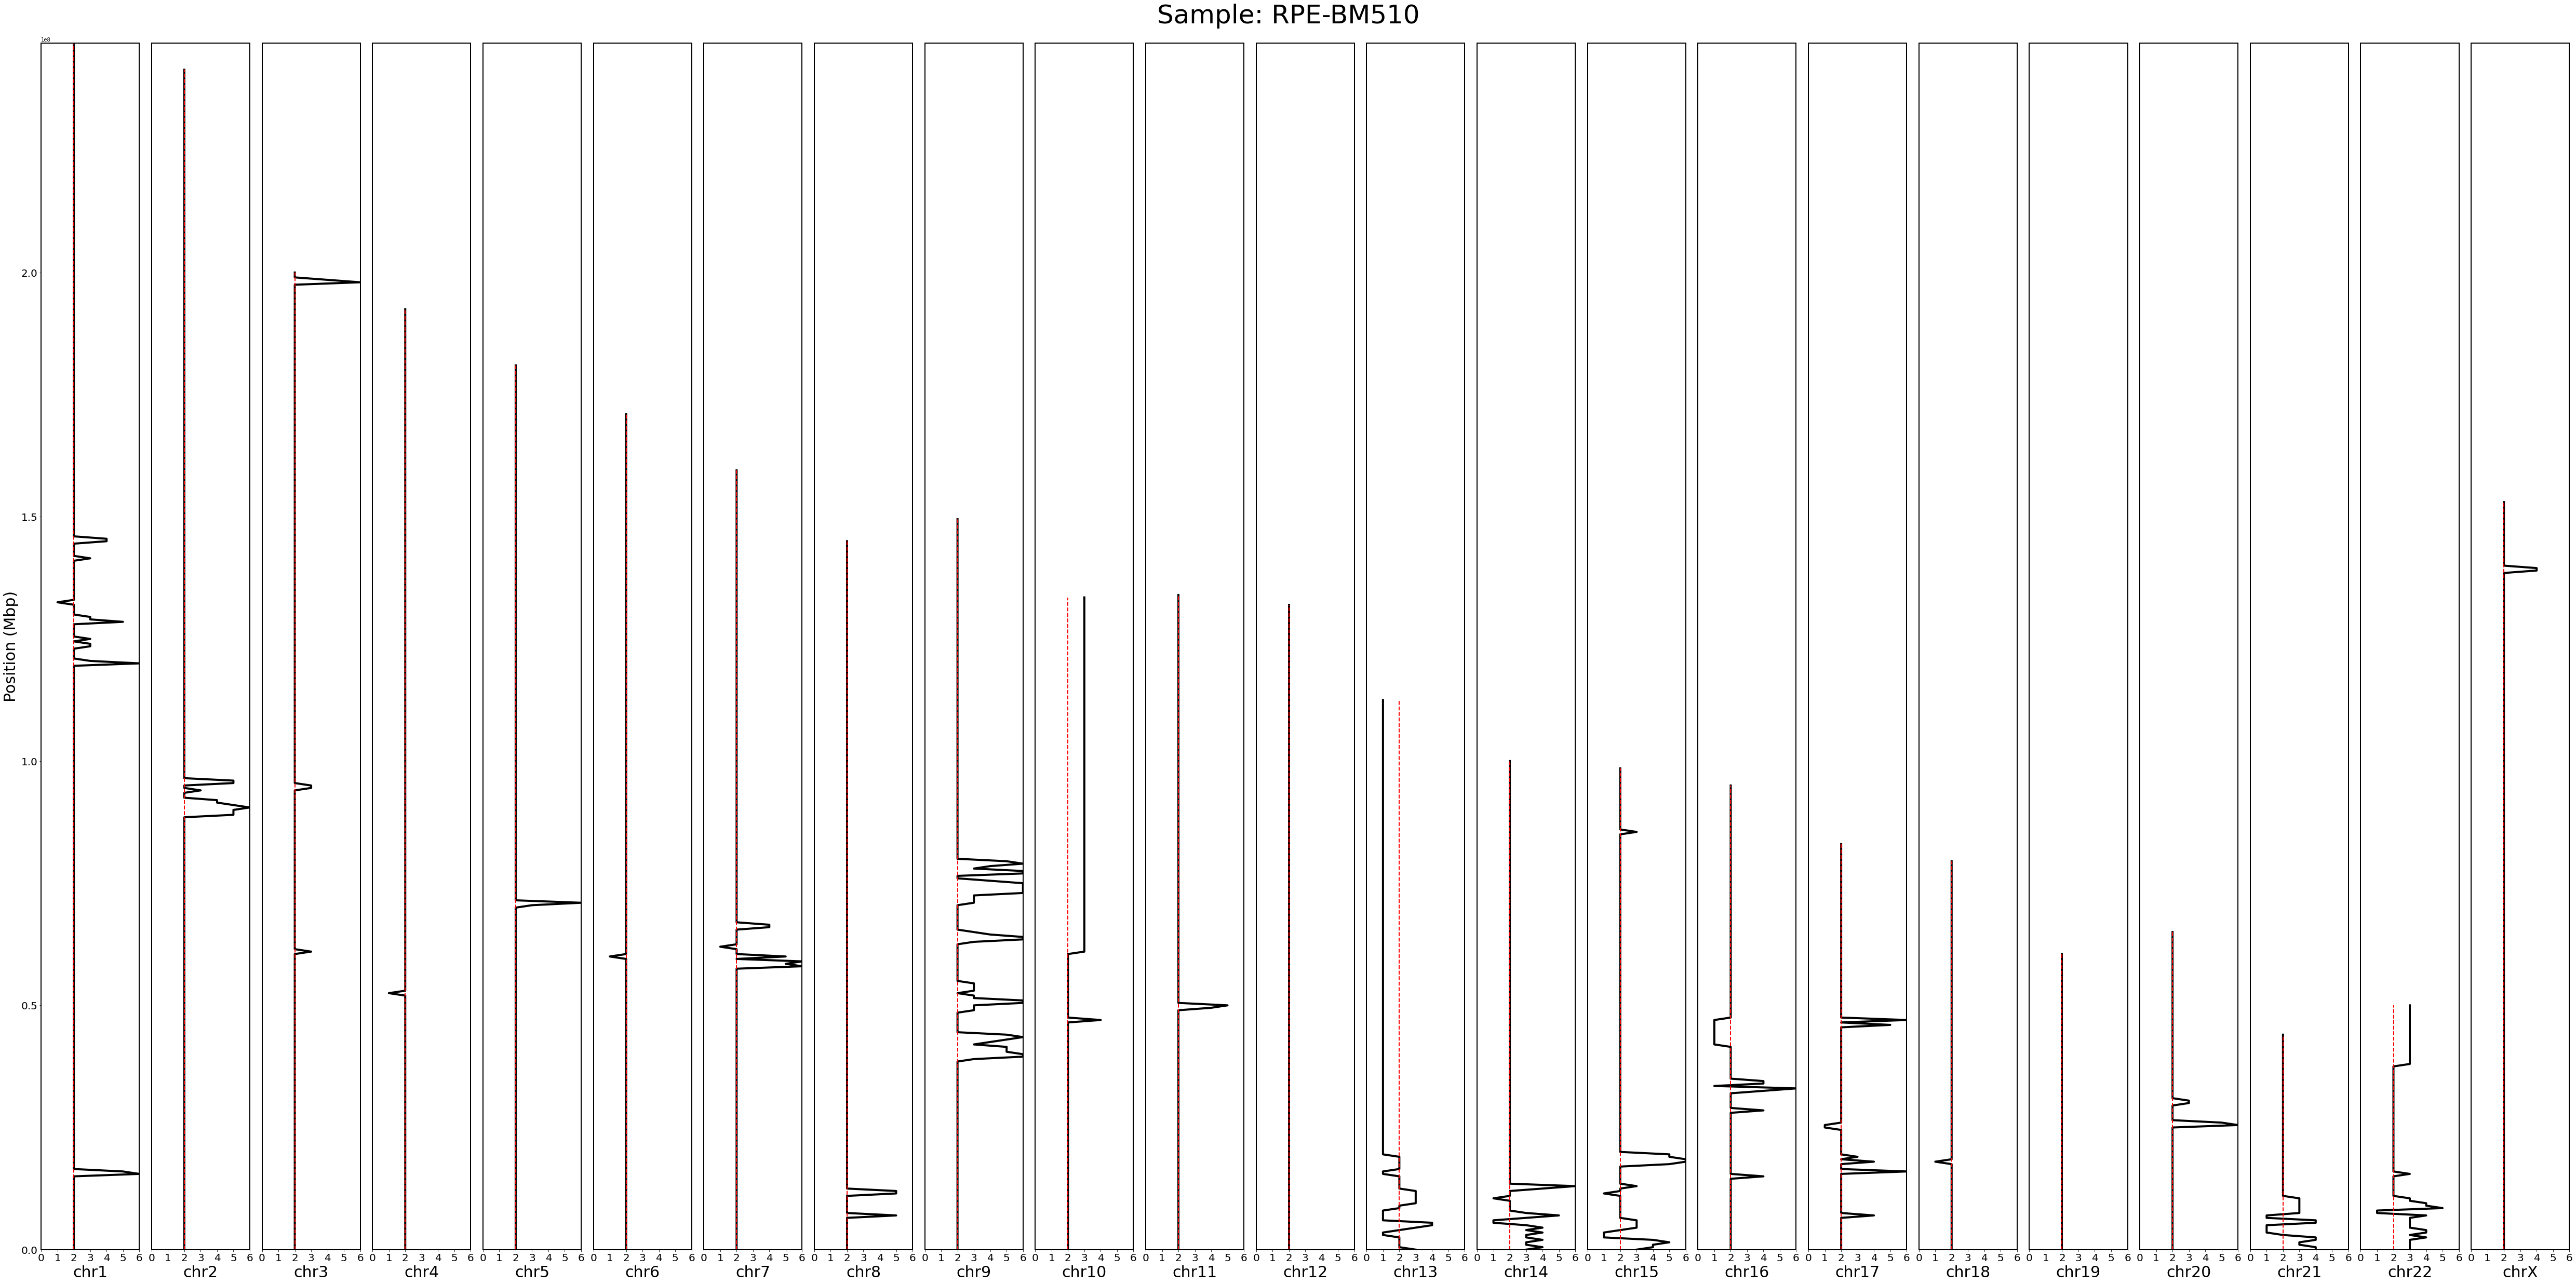

In [6]:


col_nb = len(df["#chrom"].unique())
col_nb = col_nb + 1 if col_nb == 1 else col_nb
f, ax = plt.subplots(ncols=col_nb, figsize=(3*col_nb,35))

# ax = np.array(ax)
print(ax)

for i, chrom in enumerate(df["#chrom"].unique().tolist()):
    ax[i].plot(df.loc[df["#chrom"] == chrom].ploidy_estimate, df.loc[df["#chrom"] == chrom].start, lw=4, color="black")
    ax[i].set_xlabel("{}".format(chrom), fontsize=30)
    ax[i].set_ylim(0,df.start.max())
    ax[i].set_xlim(0,6)
    ax[i].axvline(2, ymax=df.loc[df["#chrom"] == chrom].start.max() / df.start.max(), ls="--", lw=2, color="red")
    ax[i].tick_params(axis='x', which='major', labelsize=20)
    major_ticks = np.arange(0, 7, 1)
    ax[i].set_xticks(major_ticks)
    ax[i].grid(which='both')
    for axe in ['top','bottom','left','right']:
        ax[i].spines[axe].set_linewidth(2)
        ax[i].spines[axe].set_color("black")
    ax[i].grid(axis="both", which='major')
    if i == 0:
        ax[i].tick_params(axis='y', which='major', labelsize=20)
        ax[i].set_ylabel("Position (Mbp)", fontsize=30)
    else:
        ax[i].get_yaxis().set_visible(False)
f.suptitle("Sample: {}".format("RPE-BM510"), fontsize=50)
plt.tight_layout()
plt.subplots_adjust(top=0.95)